In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras import optimizers, losses, activations, models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
training_dir = 'C:/Users/ASUS/Desktop/centrov/train'
validation_dir = 'C:/Users/ASUS/Desktop/centrov/valid'
test_dir = 'C:/Users/ASUS/Desktop/centrov/test'

In [3]:
image_files = glob(training_dir + '/*/*.png')
valid_image_files = glob(validation_dir + '/*/*.png')

In [4]:
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 2


In [5]:
import tensorflow as tf 
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
#from keras.preprocessing import image

IMAGE_SIZE = [64, 64]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0, 
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')

Found 495 images belonging to 2 classes.
Found 145 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [8]:
import tensorflow as tf
from keras.models import *
from keras.layers import *
opt = tf.optimizers.Adam(lr=1e-3)
model.compile(optimizer=opt, 
    loss=losses.binary_crossentropy, 
    metrics=['accuracy', 'Precision', 'AUC', tf.keras.metrics.Recall(), tf.keras.metrics.TrueNegatives()])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
training_images = 495
validation_images = 145

history = model.fit(training_generator, # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results. 
                   epochs = 100,  # change this for better results
                   validation_data = validation_generator)  # this should be equal to total number of images in validation set.

Epoch 1/100
3/3 [==============================] - 21s 7s/step - loss: 0.6979 - accuracy: 0.5434 - precision: 0.5434 - auc: 0.5596 - recall: 0.5434 - true_negatives: 269.0000 - val_loss: 0.7084 - val_accuracy: 0.5448 - val_precision: 0.5448 - val_auc: 0.5145 - val_recall: 0.5448 - val_true_negatives: 79.0000
Epoch 2/100
3/3 [==============================] - 17s 6s/step - loss: 0.6762 - accuracy: 0.6040 - precision: 0.6040 - auc: 0.6406 - recall: 0.6040 - true_negatives: 299.0000 - val_loss: 0.7009 - val_accuracy: 0.5655 - val_precision: 0.5655 - val_auc: 0.5221 - val_recall: 0.5655 - val_true_negatives: 82.0000
Epoch 3/100
3/3 [==============================] - 17s 7s/step - loss: 0.6550 - accuracy: 0.6465 - precision: 0.6465 - auc: 0.6905 - recall: 0.6465 - true_negatives: 320.0000 - val_loss: 0.7016 - val_accuracy: 0.5793 - val_precision: 0.5793 - val_auc: 0.5304 - val_recall: 0.5793 - val_true_negatives: 84.0000
Epoch 4/100
3/3 [==============================] - 18s 8s/step - loss:

3/3 [==============================] - 22s 7s/step - loss: 0.5629 - accuracy: 0.6909 - precision: 0.6909 - auc: 0.7809 - recall: 0.6909 - true_negatives: 342.0000 - val_loss: 0.6826 - val_accuracy: 0.5793 - val_precision: 0.5793 - val_auc: 0.6189 - val_recall: 0.5793 - val_true_negatives: 84.0000
Epoch 28/100
3/3 [==============================] - 21s 9s/step - loss: 0.5623 - accuracy: 0.6970 - precision: 0.6970 - auc: 0.7814 - recall: 0.6970 - true_negatives: 345.0000 - val_loss: 0.6789 - val_accuracy: 0.6000 - val_precision: 0.6000 - val_auc: 0.6261 - val_recall: 0.6000 - val_true_negatives: 87.0000
Epoch 29/100
3/3 [==============================] - 19s 6s/step - loss: 0.5607 - accuracy: 0.6909 - precision: 0.6909 - auc: 0.7826 - recall: 0.6909 - true_negatives: 342.0000 - val_loss: 0.6846 - val_accuracy: 0.5655 - val_precision: 0.5655 - val_auc: 0.6182 - val_recall: 0.5655 - val_true_negatives: 82.0000
Epoch 30/100
3/3 [==============================] - 20s 6s/step - loss: 0.5585 -

3/3 [==============================] - 18s 6s/step - loss: 0.5338 - accuracy: 0.7313 - precision: 0.7313 - auc: 0.8129 - recall: 0.7313 - true_negatives: 362.0000 - val_loss: 0.6713 - val_accuracy: 0.6069 - val_precision: 0.6069 - val_auc: 0.6420 - val_recall: 0.6069 - val_true_negatives: 88.0000
Epoch 54/100
3/3 [==============================] - 22s 9s/step - loss: 0.5328 - accuracy: 0.7313 - precision: 0.7313 - auc: 0.8141 - recall: 0.7313 - true_negatives: 362.0000 - val_loss: 0.6755 - val_accuracy: 0.5931 - val_precision: 0.5931 - val_auc: 0.6364 - val_recall: 0.5931 - val_true_negatives: 86.0000
Epoch 55/100
3/3 [==============================] - 22s 9s/step - loss: 0.5322 - accuracy: 0.7394 - precision: 0.7394 - auc: 0.8151 - recall: 0.7394 - true_negatives: 366.0000 - val_loss: 0.6778 - val_accuracy: 0.5793 - val_precision: 0.5793 - val_auc: 0.6342 - val_recall: 0.5793 - val_true_negatives: 84.0000
Epoch 56/100
3/3 [==============================] - 23s 7s/step - loss: 0.5316 -

3/3 [==============================] - 21s 7s/step - loss: 0.5127 - accuracy: 0.7414 - precision: 0.7414 - auc: 0.8330 - recall: 0.7414 - true_negatives: 367.0000 - val_loss: 0.6616 - val_accuracy: 0.6345 - val_precision: 0.6345 - val_auc: 0.6610 - val_recall: 0.6345 - val_true_negatives: 92.0000
Epoch 80/100
3/3 [==============================] - 21s 7s/step - loss: 0.5137 - accuracy: 0.7535 - precision: 0.7535 - auc: 0.8317 - recall: 0.7535 - true_negatives: 373.0000 - val_loss: 0.6720 - val_accuracy: 0.6069 - val_precision: 0.6069 - val_auc: 0.6480 - val_recall: 0.6069 - val_true_negatives: 88.0000
Epoch 81/100
3/3 [==============================] - 20s 7s/step - loss: 0.5125 - accuracy: 0.7616 - precision: 0.7616 - auc: 0.8331 - recall: 0.7616 - true_negatives: 377.0000 - val_loss: 0.6656 - val_accuracy: 0.6069 - val_precision: 0.6069 - val_auc: 0.6565 - val_recall: 0.6069 - val_true_negatives: 88.0000
Epoch 82/100
3/3 [==============================] - 21s 7s/step - loss: 0.5110 -

In [13]:
import statistics
print (statistics.mean(history.history['accuracy']))
print (statistics.mean(history.history['val_accuracy']))
print (statistics.mean(history.history['precision']))
print (statistics.mean(history.history['recall']))
print (statistics.mean(history.history['auc']))

0.7175151520967483
0.5934482800960541
0.7175151520967483
0.7175151520967483
0.7979259645938873


loss


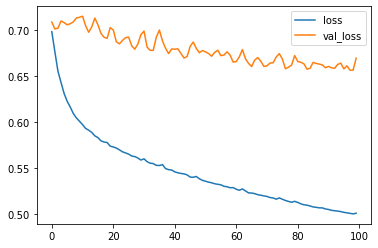

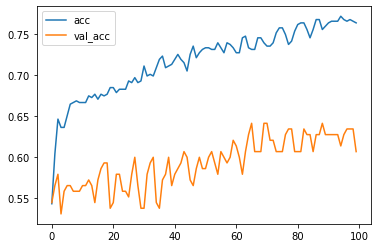

In [14]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
print('loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

NameError: name 'test_X' is not defined

In [15]:
model.evaluate(test_generator)

1/1 [==============================] - 2s 2s/step - loss: 0.8622 - accuracy: 0.5455 - precision: 0.5455 - auc: 0.6233 - recall: 0.5455 - true_negatives: 36.0000


[0.8621824383735657,
 0.5454545617103577,
 0.5454545617103577,
 0.6232782602310181,
 0.5454545617103577,
 36.0]